In [3]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

In [20]:
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers = 3,
                  cluster_std =0.5,
                  random_state=0)


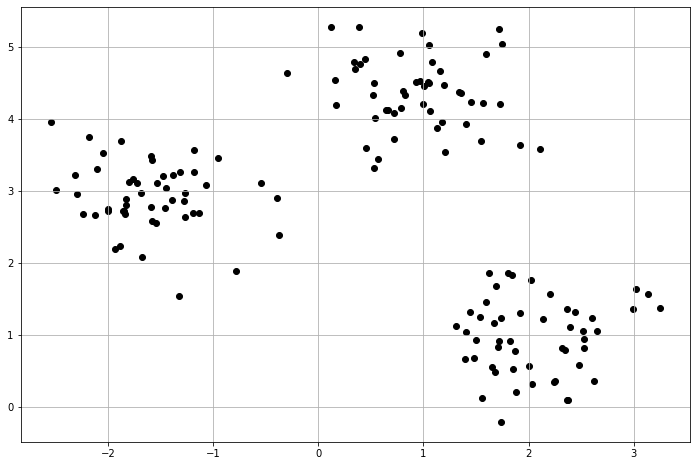

In [21]:
plt.rcParams['figure.figsize']=(12,8)

plt.scatter(X[:,0],
           X[:,1],
           c='black',
           marker = 'o')

plt.grid()
plt.show()

In [25]:
km = KMeans(n_clusters=3,
            n_init=10,
            random_state=0)


KMeans(n_clusters=3, random_state=0)

In [34]:
y_km = km.fit_predict(X)
y_km

array([0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

In [27]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()


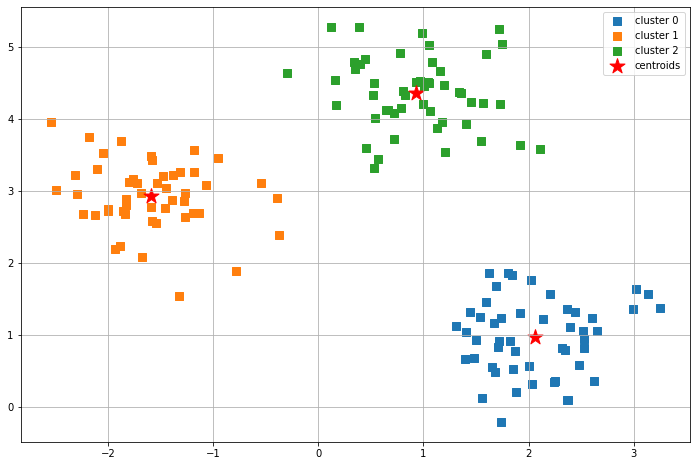

In [28]:
plot_clusters(X, y_km, plt_cluster_centers = True)

In [29]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

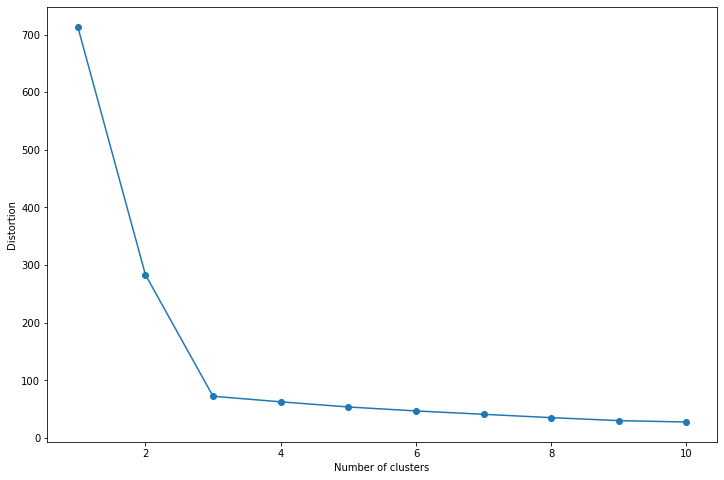

In [30]:
plot_distortion(X,max_clusters=10)

In [33]:
y_km

array([0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

In [38]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()
    

In [42]:
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

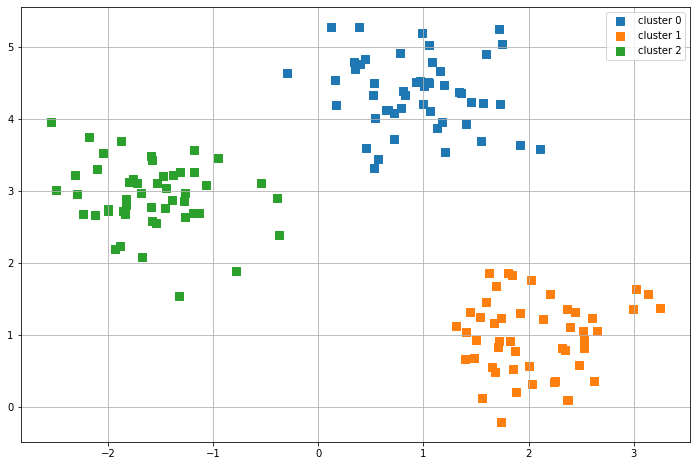

In [43]:
y_hc = ac.fit_predict(X)
plot_clusters(X, y_hc)

In [44]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

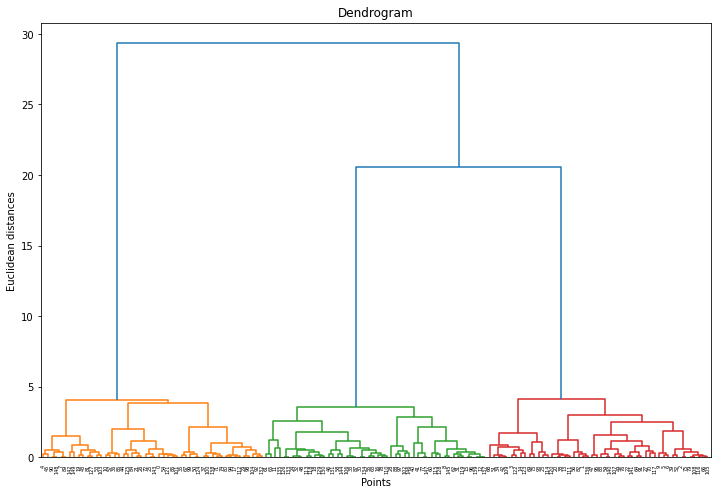

In [45]:
plot_dendrogram(X)

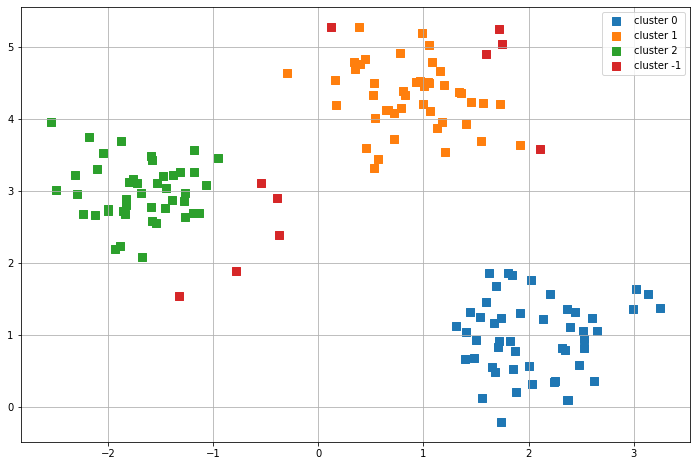

In [46]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=0.5,
          min_samples=5,
          metric = 'euclidean')

y_db = db.fit_predict(X)
plot_clusters(X, y_db)

<function matplotlib.pyplot.show(close=None, block=None)>

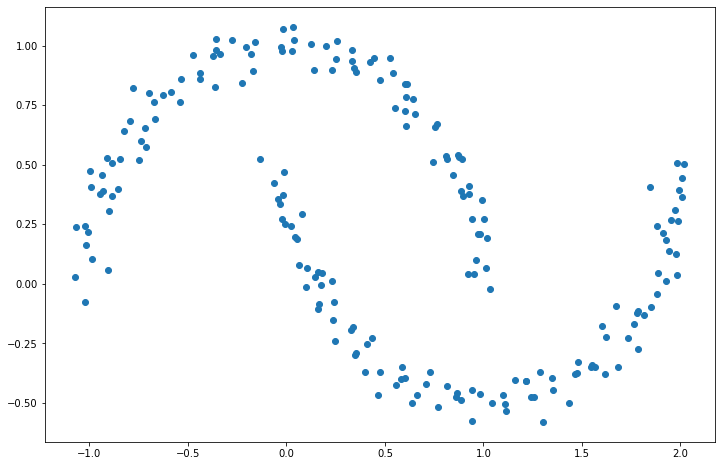

In [48]:
X, y = make_moons(n_samples=200,
                  noise = 0.05,
                  random_state=0)

plt.scatter(X[:,0], X[:,1])
plt.show

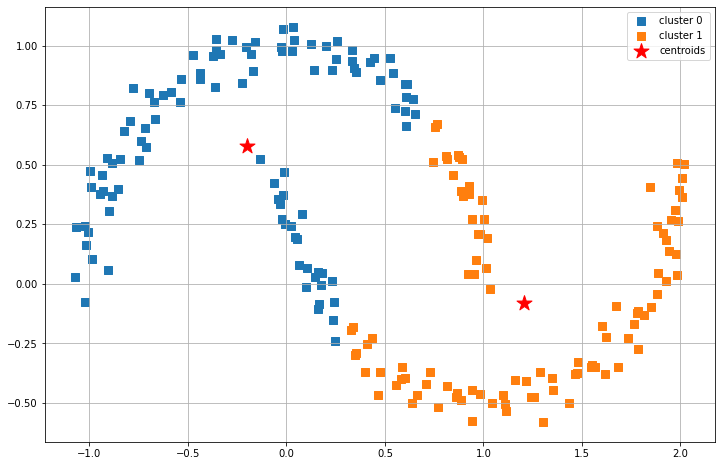

In [49]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10,
            random_state=0,)

y_km = km.fit_predict(X)

# plot K-means clusters
plot_clusters(X,y_km,plt_cluster_centers=True)

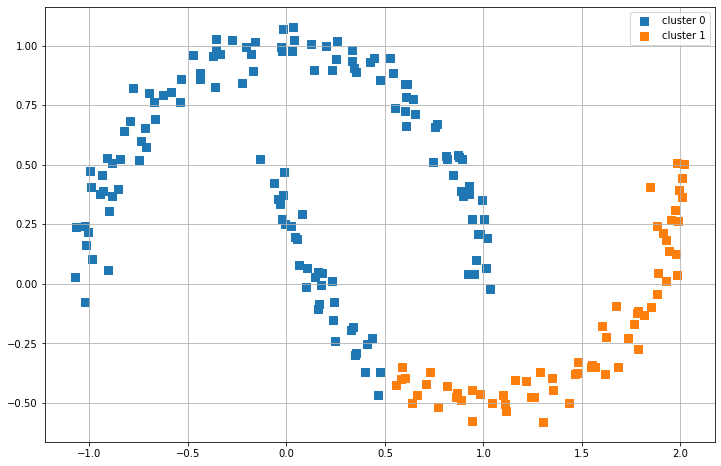

In [50]:
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
y_hc = ac.fit_predict(X)

# plot HC clusters
plot_clusters(X,y_hc)

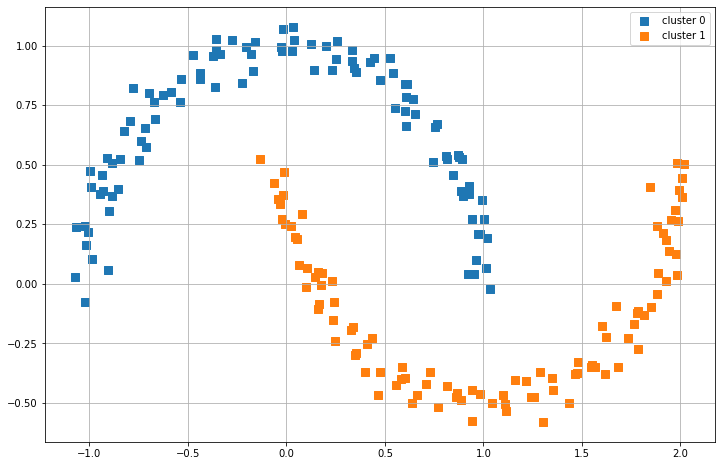

In [51]:
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

# plot DBSCAN clusters
plot_clusters(X,y_db)

In [52]:
y_db

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])